# Binning the LineP data into 1m bins
This notebook will 
1. load the csv with "raw" line P data at the sampling depths.
2. We assign each sample to the neartest bin
3. if there is more than 1 measurement per bin we include both as separate rows (no averaging)

In [1]:
# example for diagnostics
import pandas as pd
import numpy as np

# Read one file
#input_path = '/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/SD-Ocean/observations_LineP/OSD_Archive/raw_extract/'
input_path ='/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/OUTPUTS_LINEP/'# '/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/SD-Ocean/observations_LineP/OSD_Archive/raw_extract/'

file_path = input_path+'LineP_ctds_1969.csv'
df = pd.read_csv(file_path)

print("Original data shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nDepth column info:")
print(f"  Min depth: {df['CTDPRS_DBAR'].min()}")
print(f"  Max depth: {df['CTDPRS_DBAR'].max()}")
print(f"  NaN values: {df['CTDPRS_DBAR'].isna().sum()}")

# Try the binning
depth_column = 'CTDPRS_DBAR'
bin_width = 1
bin_edges = np.arange(0, 7000, bin_width)
bin_centers = bin_edges[:-1] + bin_width/2

df['PRS_bin_cntr'] = pd.cut(df[depth_column], bins=bin_edges, labels=bin_centers, right=False)

print("\nAfter binning:")
print(f"  NaN bins: {df['PRS_bin_cntr'].isna().sum()}")
print(f"  Non-NaN bins: {df['PRS_bin_cntr'].notna().sum()}")
print("\nBin value counts:")
print(df['PRS_bin_cntr'].value_counts().head(10))

# Try the groupby
print("\nAttempting groupby:")
df_binned = df.groupby(['file', 'PRS_bin_cntr'], observed=True).first().reset_index()
print(f"  Result shape: {df_binned.shape}")
print(df_binned.head())

Original data shape: (10193, 11)

First few rows:
                  time                           file  CTDPRS_DBAR  \
0  1969-08-26 22:18:00  P_CastCTD_1969-08-26_2218h.nc     0.000000   
1  1969-08-26 22:18:00  P_CastCTD_1969-08-26_2218h.nc     5.043289   
2  1969-08-26 22:18:00  P_CastCTD_1969-08-26_2218h.nc    10.086701   
3  1969-08-26 22:18:00  P_CastCTD_1969-08-26_2218h.nc    20.173897   
4  1969-08-26 22:18:00  P_CastCTD_1969-08-26_2218h.nc    26.226450   

   CTDTMP_ITS90_DEG_C  SALINITY_PSS78  latitude  longitude  OXYGEN_MMOL_M3  \
0               12.30           32.52      50.0     -145.0             NaN   
1               12.15           32.52      50.0     -145.0             NaN   
2               12.12           32.52      50.0     -145.0             NaN   
3               12.07           32.52      50.0     -145.0             NaN   
4               12.05           32.52      50.0     -145.0             NaN   

   OXYGEN_UMOL_KG closest_linep_station_name  distance_to_cl

In [5]:
import pandas as pd
import numpy as np
import glob
import os

input_path ='/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/OUTPUTS_LINEP/'# '/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/SD-Ocean/observations_LineP/OSD_Archive/raw_extract/'
output_path = '/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/OUTPUTS_LINEP/BINNED/'

# Create output directory if it doesn't exist
#os.makedirs(output_path, exist_ok=True)

# Find all CTD files
ctd_files = sorted(glob.glob(input_path + 'LineP_ctds_*.csv'))
print(f"Found {len(ctd_files)} CTD files:\n")

# Define binning parameters
depth_column = 'CTDPRS_DBAR'
bin_width = 1  # Changed from 5 to 1m bins
bin_edges = np.arange(0, 7000, bin_width)  # Adjust max depth as needed
bin_centers = bin_edges[:-1] + bin_width/2

# Process each file
for file_path in ctd_files[:]:
    filename = os.path.basename(file_path)
    year = filename.split('_')[-1].split('.')[0]
    
    print(f"Processing: {filename}")
    
    # Read file
    df = pd.read_csv(file_path)
    original_count = len(df)
    
    # Assign each measurement to its bin (keep ALL rows)
    df['PRS_bin_cntr'] = pd.cut(df[depth_column], bins=bin_edges, labels=bin_centers, right=False)
    

    
    # Save binned file
    output_filename = os.path.join(output_path, filename.replace('.csv', '_binned_1m.csv'))
    df.to_csv(output_filename, index=False, na_rep='NaN')
    
    # Print statistics
    print(f"  Original rows: {original_count}")
    print(f"  Binned rows: {len(df)}")
    print(f"  Unique casts: {df['file'].nunique()}")
    print(f"  Unique depth bins used: {df_binned['PRS_bin_cntr'].nunique()}")
    print(f"  Saved to: {output_filename}\n")



Found 52 CTD files:

Processing: LineP_ctds_1969.csv
  Original rows: 10193
  Binned rows: 10193
  Unique casts: 278
  Unique depth bins used: 4316
  Saved to: /gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/OUTPUTS_LINEP/BINNED/LineP_ctds_1969_binned_1m.csv

Processing: LineP_ctds_1970.csv
  Original rows: 9065
  Binned rows: 9065
  Unique casts: 286
  Unique depth bins used: 4316
  Saved to: /gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/OUTPUTS_LINEP/BINNED/LineP_ctds_1970_binned_1m.csv

Processing: LineP_ctds_1971.csv
  Original rows: 6591
  Binned rows: 6591
  Unique casts: 164
  Unique depth bins used: 4316
  Saved to: /gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/OUTPUTS_LINEP/BINNED/LineP_ctds_1971_binned_1m.csv

Processing: LineP_ctds_1972.csv
  Original rows: 11836
  Binned rows: 11836
  Unique casts: 184
  Unique depth bins used: 4316
  Saved to: /gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/OUTPUTS_LINEP/BINNED/LineP_ctds_1972_binned_1m.csv

Processing: LineP_ctds_1973.csv
  Original rows: 8266
  Binned rows: 8266
 

Original shape: (207710, 11)
Binned shape: (207710, 12)

Total casts: 144
First 5 casts: ['B7_CastCTD_2008-09-02_0326h.nc' 'P18_CastCTD_2008-06-06_0706h.nc'
 'P16_CastCTD_2008-06-04_2231h.nc' 'P23_CastCTD_2008-06-07_2347h.nc'
 'P13_CastCTD_2008-02-04_0008h.nc']

Cast 1: B7_CastCTD_2008-09-02_0326h.nc
  Original measurements: 69
  Binned measurements: 69

Cast 2: P18_CastCTD_2008-06-06_0706h.nc
  Original measurements: 1909
  Binned measurements: 1909

Cast 3: P16_CastCTD_2008-06-04_2231h.nc
  Original measurements: 200
  Binned measurements: 200

✓ Saved comparison plot


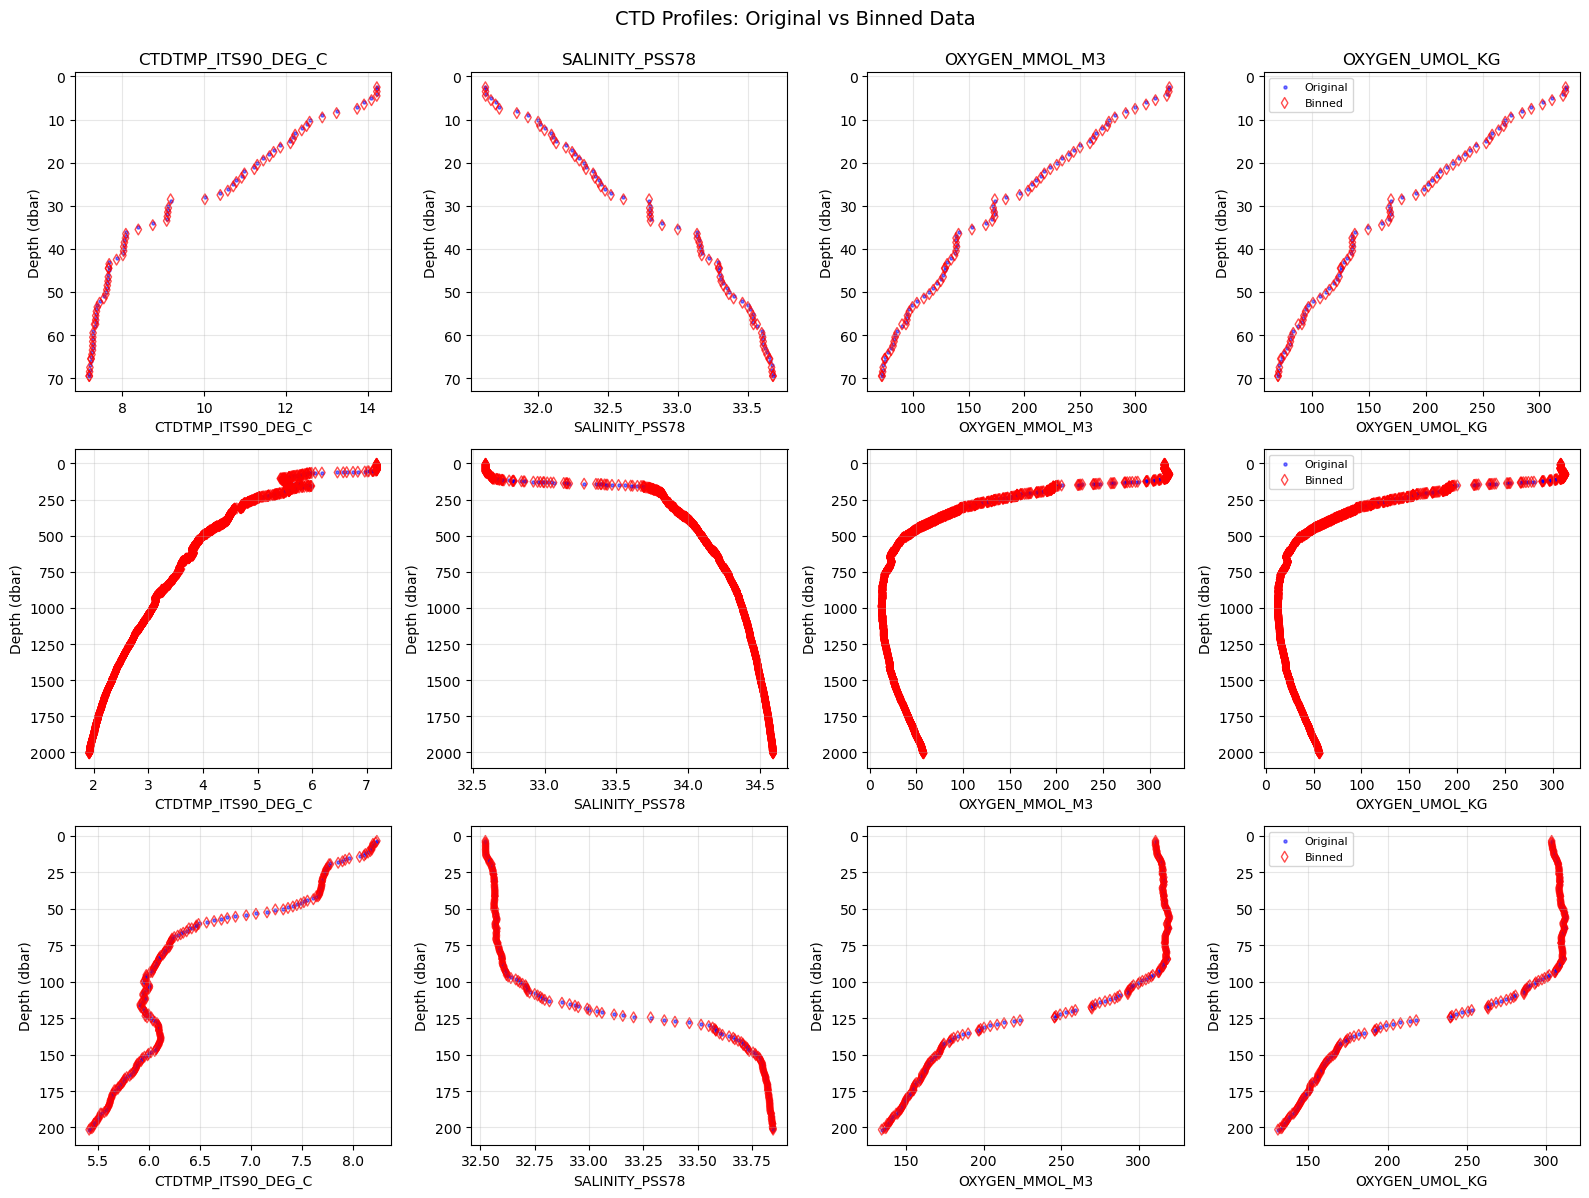


SUMMARY STATISTICS

CTDTMP_ITS90_DEG_C:
  Original - non-null: 207705, NaN: 5
  Binned   - non-null: 207705, NaN: 5

SALINITY_PSS78:
  Original - non-null: 207701, NaN: 9
  Binned   - non-null: 207701, NaN: 9

OXYGEN_MMOL_M3:
  Original - non-null: 207496, NaN: 214
  Binned   - non-null: 207496, NaN: 214

OXYGEN_UMOL_KG:
  Original - non-null: 207486, NaN: 224
  Binned   - non-null: 207486, NaN: 224


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outpath = '/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/OUTPUTS_LINEP/'

# Load both files
df_original = pd.read_csv(outpath + 'LineP_ctds_2008.csv')
df_binned = pd.read_csv(outpath + 'BINNED/LineP_ctds_2008_binned_1m.csv')

print(f"Original shape: {df_original.shape}")
print(f"Binned shape: {df_binned.shape}")

# Get unique casts
casts = df_original['file'].unique()
print(f"\nTotal casts: {len(casts)}")
print(f"First 5 casts: {casts[:5]}")

# Select a few casts to compare
num_casts_to_plot = 3
selected_casts = casts[:num_casts_to_plot]

# Create figure with subplots
fig, axes = plt.subplots(num_casts_to_plot, 4, figsize=(16, 12))

variables = ['CTDTMP_ITS90_DEG_C', 'SALINITY_PSS78', 'OXYGEN_MMOL_M3', 'OXYGEN_UMOL_KG']
depth_column = 'CTDPRS_DBAR'

for cast_idx, cast_id in enumerate(selected_casts):
    original_cast = df_original[df_original['file'] == cast_id]
    binned_cast = df_binned[df_binned['file'] == cast_id]
    
    print(f"\nCast {cast_idx + 1}: {cast_id}")
    print(f"  Original measurements: {len(original_cast)}")
    print(f"  Binned measurements: {len(binned_cast)}")
    
    for var_idx, var in enumerate(variables):
        ax = axes[cast_idx, var_idx]
        
        # Plot original data
        ax.scatter(original_cast[var], original_cast[depth_column], 
                  alpha=0.5, s=20, label='Original', color='blue', marker='.')
        
        # Plot binned data
        ax.scatter(binned_cast[var], binned_cast['PRS_bin_cntr'], 
                  alpha=0.7, s=30, label='Binned', color='None', marker='d', edgecolor='r')
        
        ax.set_ylabel('Depth (dbar)')
        ax.set_xlabel(var)
        ax.invert_yaxis()
        ax.grid(True, alpha=0.3)
        
        if cast_idx == 0:
            ax.set_title(var)
        if var_idx == 3:
            ax.legend(loc='best', fontsize=8)

plt.suptitle('CTD Profiles: Original vs Binned Data', fontsize=14, y=0.995)
plt.tight_layout()
plt.savefig( 'Figures/profile_comparison_original_vs_binned.png', dpi=150, bbox_inches='tight')
print("\n✓ Saved comparison plot")
plt.show()

# Summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

for var in variables:
    print(f"\n{var}:")
    print(f"  Original - non-null: {df_original[var].notna().sum()}, NaN: {df_original[var].isna().sum()}")
    print(f"  Binned   - non-null: {df_binned[var].notna().sum()}, NaN: {df_binned[var].isna().sum()}")